In [3]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import yfinance as yf
import os  
import json

In [4]:
# Define the ticker for Solana
sol_ticker = yf.Ticker("SOL-USD")

# Check if the CSV file already exists
if os.path.exists("sol.csv"):
    sol = pd.read_csv("sol.csv", index_col=0)
else:
    sol = sol_ticker.history(period="max")
    sol.to_csv("sol.csv")
sol

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-04-10 00:00:00+00:00,0.832005,1.313487,0.694187,0.951054,87364276,0.0,0.0
2020-04-11 00:00:00+00:00,0.951054,1.049073,0.765020,0.776819,43862444,0.0,0.0
2020-04-12 00:00:00+00:00,0.785448,0.956670,0.762426,0.882507,38736897,0.0,0.0
2020-04-13 00:00:00+00:00,0.890760,0.891603,0.773976,0.777832,18211285,0.0,0.0
2020-04-14 00:00:00+00:00,0.777832,0.796472,0.628169,0.661925,16747614,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-30 00:00:00+00:00,168.072678,172.417786,163.683960,166.976532,2932316784,0.0,0.0
2024-05-31 00:00:00+00:00,166.976532,170.631561,163.933090,165.637711,2415920333,0.0,0.0
2024-06-01 00:00:00+00:00,165.637726,167.737091,165.585617,166.030670,1058869941,0.0,0.0


In [5]:
df = pd.read_csv('sol.csv')
df.head(5) 

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-04-10 00:00:00+00:00,0.832005,1.313487,0.694187,0.951054,87364276,0.0,0.0
1,2020-04-11 00:00:00+00:00,0.951054,1.049073,0.765020,0.776819,43862444,0.0,0.0
2,2020-04-12 00:00:00+00:00,0.785448,0.956670,0.762426,0.882507,38736897,0.0,0.0
3,2020-04-13 00:00:00+00:00,0.890760,0.891603,0.773976,0.777832,18211285,0.0,0.0
4,2020-04-14 00:00:00+00:00,0.777832,0.796472,0.628169,0.661925,16747614,0.0,0.0


In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [7]:
df.drop([ 'Open', 'High', 'Low',  'Dividends', 'Stock Splits', 'Volume'], inplace = True, axis = 1)

In [8]:
df['time'] = pd.to_datetime(df['Date'])
df['formatted_time'] = df['time'].dt.strftime('%d-%m-%Y')
df['formatted_time']

0       10-04-2020
1       11-04-2020
2       12-04-2020
3       13-04-2020
4       14-04-2020
           ...    
1511    30-05-2024
1512    31-05-2024
1513    01-06-2024
1514    02-06-2024
1515    03-06-2024
Name: formatted_time, Length: 1516, dtype: object

In [9]:
df.drop([ 'Date', 'time'], inplace = True, axis = 1)

In [10]:
df

,Close,formatted_time
0,0.951054,10-04-2020
1,0.776819,11-04-2020
2,0.882507,12-04-2020
3,0.777832,13-04-2020
4,0.661925,14-04-2020
...,...,...
1511,166.976532,30-05-2024
1512,165.637711,31-05-2024
1513,166.030670,01-06-2024
1514,163.249908,02-06-2024


In [11]:
# df['Symbol'].unique()

In [12]:
# df[df['Symbol'] == 'BTC']['Close'].plot()

In [13]:
df.describe()

,Close
count,1516.000000
mean,54.675174
std,59.301607
min,0.515273
25%,14.102368
50%,30.028152
75%,91.004284
max,258.934326


In [14]:
# for i in df['Symbol'].unique():
#     print(len(df[df['Symbol'] == i]))

In [15]:
# state = pd.get_dummies(df['Symbol'])
# state

In [16]:
# df = df.drop('Symbol', axis = 1) 
# df = pd.concat([df, state], axis = 1)
# df.head()

In [17]:
# df = df.replace({True : 1, False : 0})

In [18]:
import pandas_ta as ta
 
df['SMA'] = ta.sma(df['Close'], length=5) 
df['EMA'] = ta.ema(df['Close'], length=5) 
df['RSI'] = ta.rsi(df['Close'], length=14) 

In [19]:
df

,Close,formatted_time,SMA,EMA,RSI
0,0.951054,10-04-2020,NaN,NaN,NaN
1,0.776819,11-04-2020,NaN,NaN,NaN
2,0.882507,12-04-2020,NaN,NaN,NaN
3,0.777832,13-04-2020,NaN,NaN,NaN
4,0.661925,14-04-2020,0.810027,0.810027,NaN
...,...,...,...,...,...
1511,166.976532,30-05-2024,167.409421,168.110910,53.379252
1512,165.637711,31-05-2024,167.866782,167.286510,52.208216
1513,166.030670,01-06-2024,167.073688,166.867897,52.537340
1514,163.249908,02-06-2024,165.993500,165.661901,49.917586


In [20]:
df.fillna(0, inplace = True)

In [21]:
new_df = df.copy()

In [22]:
X = new_df.drop(['Close', 'formatted_time'], axis = 1).values
Y = new_df['Close'].values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense
from keras.optimizers import Adam


In [25]:
rf = RandomForestRegressor()
 
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300]
}
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)
grid_search_rf.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [50, 100, 150, 200, 250, 300]})

In [26]:
best_rf = grid_search_rf.best_estimator_
best_rf

RandomForestRegressor(n_estimators=150)

In [27]:
y_pred_rf = best_rf.predict(X_test)
y_pred_rf

array([  0.57279042,   3.12410299, 138.78694865,  29.06176352,
        40.51696686,  20.9833419 , 220.17086171,   2.21092007,
       137.23849274, 195.84607666,  21.13336896,   0.58102506,
       137.731309  ,   2.51727386,  22.23531727,  40.13953273,
        39.02802785, 202.50169525, 148.46151042,  33.06872864,
       141.77111572,   1.46293824,  23.45276307,   4.35346618,
        37.52761912,  28.46250345,  31.81559411,   2.07019934,
        14.80919221, 102.15899378,   3.01911815,  87.5029454 ,
       210.60831187,  28.81760555,  33.62970731,  71.25109049,
        32.29724083,   0.73085377,  17.19568347,  20.22122392,
        40.43654154,  29.65735902,  65.4042894 ,  56.50273313,
       136.62910512,  39.51144005,  45.43925199,  14.21314304,
        23.33024241,  88.88318319,   0.64417526,  23.90625951,
        11.51795596, 160.39156738,  26.38923517, 162.32710704,
        28.25905295,  33.7925351 ,  31.41977511,  60.06436478,
        13.94160924,   3.21046074,  55.88239446,  21.78

In [28]:
rf_metrics = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}
print(rf_metrics)


{'RMSE': 2.733542659420637, 'MSE': 7.472255470872448, 'MAE': 1.3457982635811754, 'R2': 0.9977268536015037}


In [29]:
len(df)

1516

In [30]:
data = df [len(df) - 15:]

In [31]:
for i in range(2):
    sma = ta.sma(data['Close'], length=5).iloc[-1]
    ema = ta.ema(data['Close'], length=5).iloc[-1]
    rsi = ta.rsi(data['Close'], length=14).iloc[-1]
    # sma_5, ema_5, rsi_14 = scaler.transform(np.array([sma, ema, rsi]).reshape(-1, 1))
    # new_close = best_rf.predict([[ sma_5[0], ema_5[0], rsi_14[0]]])
    new_close = best_rf.predict([[sma, ema, rsi]])
    print(new_close)
    new_row = pd.DataFrame({"Close": new_close, "formatted_time" : "0", "SMA" : sma, "EMA" : ema, "RSI" : rsi})
    data = pd.concat([data, new_row], ignore_index= True)
    

[154.77199453]
[152.35395986]


In [32]:

# Evaluate the model
rf_metrics = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}
print(rf_metrics)


{'RMSE': 2.733542659420637, 'MSE': 7.472255470872448, 'MAE': 1.3457982635811754, 'R2': 0.9977268536015037}


In [33]:
import pickle
with open('sol.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

C:\Users\SUBRAT\AppData\Local\Temp\ipykernel_13000\3130527665.py:12: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)


                          Date       Close         SMA         EMA        RSI
1508 2024-05-27 00:00:00+00:00  169.996140         NaN         NaN        NaN
1509 2024-05-28 00:00:00+00:00  168.650848         NaN         NaN        NaN
1510 2024-05-29 00:00:00+00:00  168.072678         NaN         NaN        NaN
1511 2024-05-30 00:00:00+00:00  166.976532         NaN         NaN        NaN
1512 2024-05-31 00:00:00+00:00  165.637711         NaN         NaN        NaN
1513 2024-06-01 00:00:00+00:00  166.030670         NaN         NaN        NaN
1514 2024-06-02 00:00:00+00:00  163.249908         NaN         NaN        NaN
1515 2024-06-03 00:00:00+00:00  164.761383         NaN         NaN        NaN
1516 2024-06-04 00:00:00+00:00  162.319285  165.331241  165.361728  51.337966
1517 2024-06-05 00:00:00+00:00  158.631720  164.399791  164.347580  48.923699


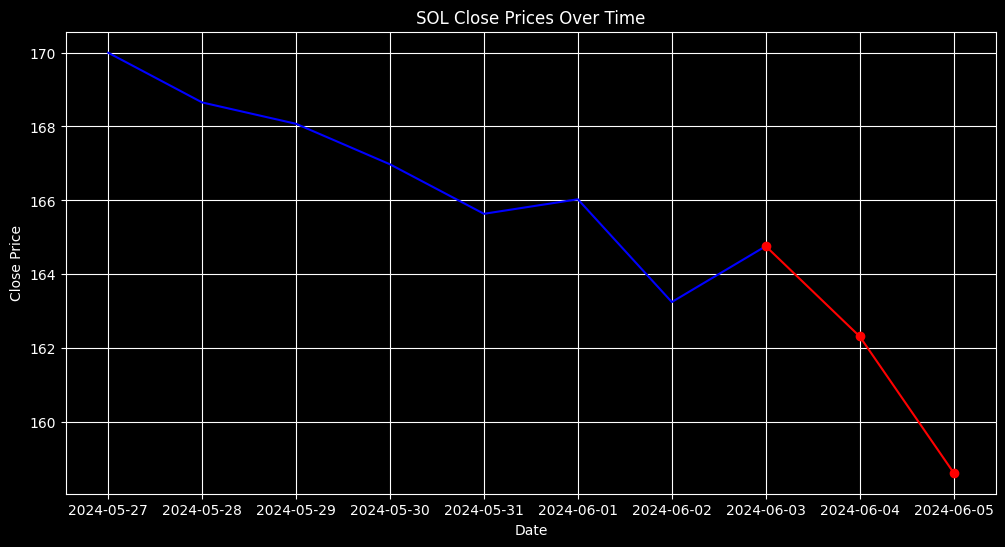

In [34]:
import pandas as pd
import pickle
import pandas_ta as ta
from datetime import timedelta
import matplotlib.pyplot as plt

def file(Type):
    if Type == 'sol':
        df = pd.read_csv('sol.csv', usecols=['Date', 'Close'])
        with open('sol.pkl', 'rb') as f:
            model = pickle.load(f)
        df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
        for i in range(2):
            sma = ta.sma(df['Close'], length=5).iloc[-1]
            ema = ta.ema(df['Close'], length=5).iloc[-1]
            rsi = ta.rsi(df['Close'], length=14).iloc[-1]
            new_close = model.predict([[sma, ema, rsi]])
            new_date = df['Date'].iloc[-1] + timedelta(days=1)
            new_row = {
                "Date": new_date,
                "Close": new_close[0],  # Assuming the model returns an array
                "SMA": sma,
                "EMA": ema,
                "RSI": rsi
            }
            df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
        last_10_days = df.tail(10)
        print(last_10_days)
        
        # Plotting the graph
        plt.style.use('dark_background')
        plt.figure(figsize=(12, 6))
        # Plot all but the last two points
        plt.plot(last_10_days['Date'][:-2], last_10_days['Close'][:-2], linestyle='-', color='b')
        
        # Highlight the last two points
        plt.plot(last_10_days['Date'][-3:], last_10_days['Close'][-3:], linestyle='-', color='r', marker='o')
        plt.title('SOL Close Prices Over Time')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.grid(True)  
        plt.show()

# Call the function with 'sol'
file('sol')
